Download books of two authors from the Gutenberg Project
Use HC scores to attribute each book to the corpus of its author.

Requires python package 'gutenberg'

In [1]:
import pandas as pd
import numpy as np
import os
import re
import codecs
from tqdm import tqdm

#import auxiliary functions for python
import sys
sys.path.append('/Users/kipnisal/Documents/Authorship/')
from AuthAttLib import *
from visualize_HC_scores import *
%matplotlib inline

from gutenberg.acquire import load_etext
from gutenberg.cleanup import strip_headers

<H1> Dicknes vs Austin </H1>

<H3>Download data Gutenberg.org</H3>

In [2]:
import pandas as pd
import requests

Austin = [
('Jane Austin', 'Persuasion', "http://www.gutenberg.org/cache/epub/105/pg105.txt"),
('Jane Austin', 'Emma', "https://www.gutenberg.org/files/158/158-0.txt"),
('Jane Austin', 'Lady Susan', "http://www.gutenberg.org/cache/epub/946/pg946.txt"),
('Jane Austin', 'Mansfield Park', "https://www.gutenberg.org/files/141/141-0.txt"),
('Jane Austin', 'Northanger Abbey', "https://www.gutenberg.org/files/121/121-0.txt"),
('Jane Austin', 'Pride and Prejudice', "https://www.gutenberg.org/files/1342/1342-0.txt"),
('Jane Austin', 'Love and Friendship (Early Works)', "https://www.gutenberg.org/files/1212/1212-0.txt")
]
Dickens = [('Charles Dickens', 'American Notes', "https://www.gutenberg.org/files/675/675-0.txt"),
('Charles Dickens', 'Barnaby Rudge', "https://www.gutenberg.org/files/917/917-0.txt"),
('Charles Dickens', 'Children Stories', "http://www.gutenberg.org/cache/epub/37121/pg37121.txt"),
('Charles Dickens', 'The Battle of Life', "http://www.gutenberg.org/cache/epub/676/pg676.txt"),
('Charles Dickens', 'Bleak House', "http://www.gutenberg.org/cache/epub/1023/pg1023.txt"),
('Charles Dickens', 'David Copperfield', "https://www.gutenberg.org/files/766/766-0.txt"),
('Charles Dickens', 'Doctor Marigold', "http://www.gutenberg.org/cache/epub/1415/pg1415.txt"),
('Charles Dickens', 'Great Expectations', "https://www.gutenberg.org/files/1400/1400-0.txt"),
('Charles Dickens', 'Oliver Twist', "http://www.gutenberg.org/cache/epub/730/pg730.txt"),
('Charles Dickens', 'A Tale of Two Cities', 'https://www.gutenberg.org/files/98/98-0.txt'),
('Charles Dickens', 'A Chrismas Carol', 'https://www.gutenberg.org/files/46/46-0.txt'),
('Charles Dickens', 'Little Dorit', 'https://www.gutenberg.org/files/963/963-0.txt'),
('Charles Dickens', 'Hard Times', 'https://www.gutenberg.org/files/786/786-0.txt'),
('Charles Dickens', 'The Pickwick Papers', 'https://www.gutenberg.org/files/580/580-0.txt'),
('Charles Dickens', 'Our Mutual Friend', 'https://www.gutenberg.org/files/883/883-0.txt'),
('Charles Dickens', 'The Mufdog and Other Sketches', 'https://www.gutenberg.org/files/912/912-0.txt'),
('Charles Dickens', 'Nicholas Nickleby', 'https://www.gutenberg.org/files/967/967-0.txt'),
('Charles Dickens', 'The Old Curiosity Shop', 'https://www.gutenberg.org/files/700/700-0.txt'),
('Charles Dickens', 'A Child\'s History of England' , 'http://www.gutenberg.org/cache/epub/699/pg699.txt'),
('Charles Dickens', 'The Mystery of Edwin Drood', 'https://www.gutenberg.org/files/564/564-0.txt'),
('Charles Dickens', 'Martin Chuzzlewit', 'https://www.gutenberg.org/files/968/968-0.txt'),
('Charles Dickens', 'Sketches by Boz', 'https://www.gutenberg.org/files/882/882-0.txt'),
('Charles Dickens', 'Dombey and son', 'https://www.gutenberg.org/files/821/821-0.txt'),
('Charles Dickens', 'The Lamplighter', 'https://www.gutenberg.org/files/927/927-0.txt')
]
Bronte_sisters = [
    ('Charlotte', 'Villette', 'http://www.gutenberg.org/cache/epub/9182/pg9182.txt'),
    ('Charlotte', 'Shirley', 'https://www.gutenberg.org/files/30486/30486-0.txt'),
    ('Charlotte', 'The Professor', 'https://www.gutenberg.org/files/1028/1028-0.txt'),
    ('Charlotte', 'Jane Eyre', 'http://www.gutenberg.org/cache/epub/1260/pg1260.txt'),
    ('Anne', 'The Tenant of Wildfell Hall', 'https://www.gutenberg.org/files/969/969-0.txt'),
    ('Anne', 'Agnes Grey', 'https://www.gutenberg.org/files/767/767-0.txt'),
    ('Emily', 'Wuthering Heights', 'http://www.gutenberg.org/cache/epub/768/pg768.txt'),
    ('Anne/Charlotte/Emily', 'Poems', 'http://www.gutenberg.org/cache/epub/1019/pg1019.txt'),
]

 
def download_text(url) :    
    r = requests.get(url)
    if r.status_code == requests.codes.ok :
        return r.text.encode('UTF-8') 
    else:
        print('Failed')
        return ""

lo_lists = dict({'Bronte' : Bronte_sisters,
                 'Austin' : Austin,
                 'Dickens' : Dickens})

for ls in lo_lists :
    data = pd.DataFrame(lo_lists[ls], columns=['author', 'title', 'url'])
    data.loc[:,'text'] = data.url.apply(download_text)
    for r in data.iterrows() :
        print(" Downloaded {} by {} of length {} words".format(r[1].title,r[1].author, len(r[1].text.split())) )
    #    r.text.apply(lambda x : len(x.split())).mean()

    data.to_csv(str(ls) + '.csv')

Dickens_corpus = pd.read_csv('Dickens.csv')
Austin_corpus = pd.read_csv('Austin.csv')

 Downloaded Villette by Charlotte of length 195699 words
 Downloaded Shirley by Charlotte of length 219281 words
 Downloaded The Professor by Charlotte of length 91080 words
 Downloaded Jane Eyre by Charlotte of length 188455 words
 Downloaded The Tenant of Wildfell Hall by Anne of length 171627 words
 Downloaded Agnes Grey by Anne of length 70753 words
 Downloaded Wuthering Heights by Emily of length 118899 words
 Downloaded Poems by Anne/Charlotte/Emily of length 34019 words
 Downloaded Persuasion by Jane Austin of length 86307 words
 Downloaded Emma by Jane Austin of length 160458 words
 Downloaded Lady Susan by Jane Austin of length 26065 words
 Downloaded Mansfield Park by Jane Austin of length 162562 words
 Downloaded Northanger Abbey by Jane Austin of length 80158 words
 Downloaded Pride and Prejudice by Jane Austin of length 124592 words
 Downloaded Love and Friendship (Early Works) by Jane Austin of length 36295 words
 Downloaded American Notes by Charles Dickens of length 106

<H3>Clean and prepare data</H3>

In [21]:
def clean_corpus(data) :
    HEADER = 1000
    #trim header
    data.text = data.text.apply(lambda x : x[HEADER:])
    data = data.filter(['author', 'title', 'text']).rename(columns = {'title' : 'doc_id'})
    return data


data = pd.concat([clean_corpus(Dickens_corpus), clean_corpus(Austin_corpus)])

<H3>Train Model</H3>

In [25]:
model = AuthorshipAttributionMultiText(data,
                        vocab_size = 1000,
                        words_to_ignore = [],
                        stbl = True,
                        ngram_range = (1,1),
                        )

	 AuthorModel: Creating model for Charles Dickens using 24 documents and 3000 features...
	 found 6000388 relevant tokens
	 AuthorModel: Creating model for Jane Austin using 7 documents and 3000 features...
	 found 777628 relevant tokens


In [26]:
#compute HC scores of document against each corpus 
df0 = model.internal_stats_corpus()
df = model.internal_stats()

  0%|          | 0/2 [00:00<?, ?it/s]

comparing authors against each other:


100%|██████████| 2/2 [01:47<00:00, 57.05s/it]


<H2>Illustrate results</H2>

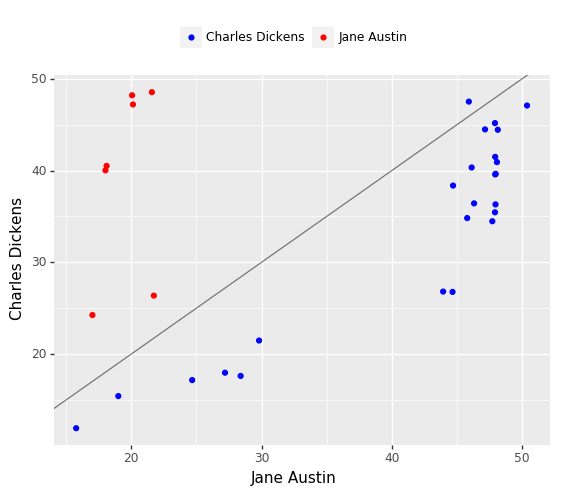

<ggplot: (-9223372036543849584)>

In [29]:
plot_author_pair_HC(df, wrt_author=('Jane Austin', 'Charles Dickens'))

<H1>Bronte Sisters</H1>

In [32]:
Bronte_corpus = pd.read_csv('Bronte.csv')

data = clean_corpus(Bronte_corpus)

model = AuthorshipAttributionMultiText(data,
                        vocab_size = 1000,
                        words_to_ignore = [],
                        stbl = True,
                        ngram_range = (1,1),
                        )



	 AuthorModel: Creating model for Charlotte using 4 documents and 1000 features...
	 found 681754 relevant tokens
	 AuthorModel: Creating model for Anne using 2 documents and 1000 features...
	 found 296912 relevant tokens
	 AuthorModel: Creating model for Emily using 1 documents and 1000 features...
	 found 109817 relevant tokens
	 AuthorModel: Creating model for Anne/Charlotte/Emily using 1 documents and 1000 features...
	 found 31152 relevant tokens


100%|██████████| 4/4 [00:16<00:00,  4.14s/it]


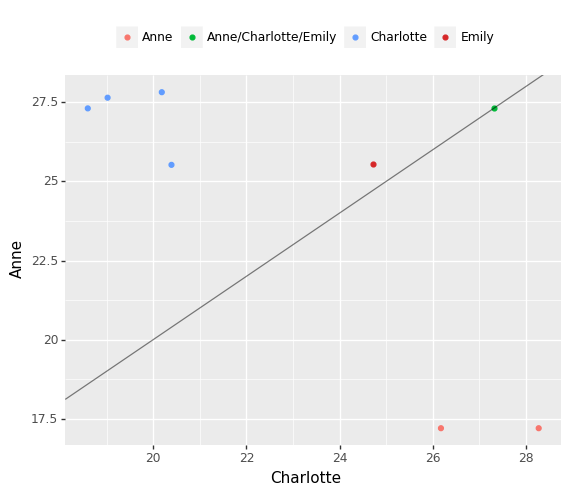

<ggplot: (-9223372036542853390)>

In [33]:
#compute HC scores of document against each corpus 
df0 = model.internal_stats_corpus()
df = model.internal_stats()

plot_author_pair_HC(df, wrt_author=('Charlotte', 'Anne'))